In [1]:
## Neurokit is a tool used in delineating Ecg signal
import neurokit2 as nk
import pandas as pd

### Pick out a patient's ECG data

In [4]:
dat = pd.read_csv('F:/btp_working_directory/D1NAMO/diabetes_subset/001/sensor_data/2014_10_01-10_09_39/2014_10_01-10_09_39_ECG.csv')

### Plotting a Sample of data

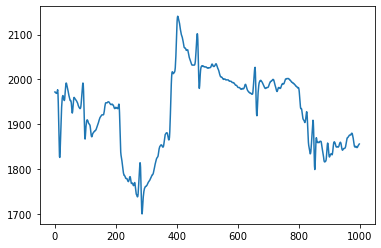

In [10]:
import matplotlib.pyplot as plt
x = dat[60000:61000]
x = x['EcgWaveform']
x = x.reset_index(drop=True)
plt.figure()
plt.plot(x)


### Applying Filters to the Signal

In [64]:
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter
import numpy as np
import matplotlib.pyplot as plt
## A high pass filter allows frequencies higher than a cut-off value
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False, output='ba')
    return b, a
## A low pass filter allows frequencies lower than a cut-off value
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False, output='ba')
    return b, a
def notch_filter(cutoff, q):
    nyq = 0.5*fs
    freq = cutoff/nyq
    b, a = iirnotch(freq, q)
    return b, a

def highpass(data, fs, order=5):
    b,a = butter_highpass(cutoff_high, fs, order=order)
    x = lfilter(b,a,data)
    return x

def lowpass(data, fs, order =5):
    b,a = butter_lowpass(cutoff_low, fs, order=order)
    y = lfilter(b,a,data)
    return y

def notch(data, powerline, q):
    b,a = notch_filter(powerline,q)
    z = lfilter(b,a,data)
    return z

def final_filter(data, fs, order=5):
    b, a = butter_highpass(cutoff_high, fs, order=order)
    x = lfilter(b, a, data)
    d, c = butter_lowpass(cutoff_low, fs, order = order)
    y = lfilter(d, c, x)
    f, e = notch_filter(powerline, 30)
    z = lfilter(f, e, y)     
    return z

ecg_singal = x
fs = 250
## Order of five works well with ECG signals
cutoff_high = 0.25
cutoff_low = 4
powerline = 60
order = 5



### Plot the filtered Signal

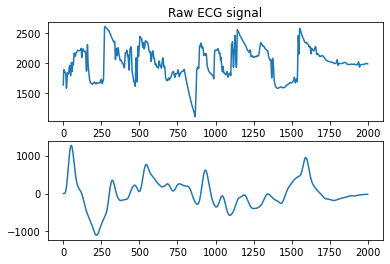

In [65]:
plt.figure()
ax1 = plt.subplot(211)
plt.plot(x)
ax1.set_title("Raw ECG signal")

filter_signal = final_filter(x, fs, order)
ax2 = plt.subplot(212)
plt.plot(filter_signal)
plt.show()

### Applying NeuroKit functions to extract R-Peaks

In [69]:
y = filter_signal
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(y, sampling_rate=1000)


In [70]:
rpeaks

{'ECG_R_Peaks': array([ 933, 1592])}

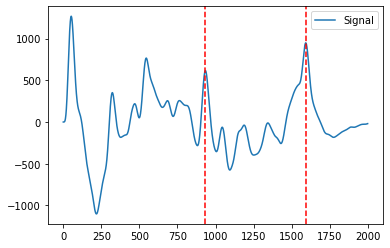

In [71]:
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], y)


### Delineating the wave peaks

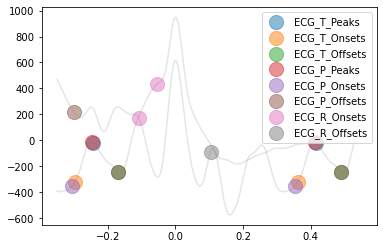

In [73]:
signal_dwt, waves_dwt = nk.ecg_delineate(y, rpeaks, sampling_rate=1000, method="dwt", show=True, show_type='all')


In [74]:
waves_dwt

{'ECG_T_Peaks': [1349, nan],
 'ECG_T_Onsets': [1295, nan],
 'ECG_T_Offsets': [1422, nan],
 'ECG_P_Peaks': [546, 1345],
 'ECG_P_Onsets': [504, 1286],
 'ECG_P_Offsets': [634, 1422],
 'ECG_R_Onsets': [825, 1537],
 'ECG_R_Offsets': [1037, nan]}